# How to plot trees of hierarchical peaks
Hierarchical peaks have a tree structure, that can be visualized by plotting the PeakTree vis-à-vis the data.

In [1]:
import random
from itertools import accumulate

import matplotlib
import matplotlib.pyplot as plt

import hierarchical_peaks as hip

%matplotlib inline
plt.style.use('seaborn')

A random walk is a great way to generate data containing hierarchical peaks:

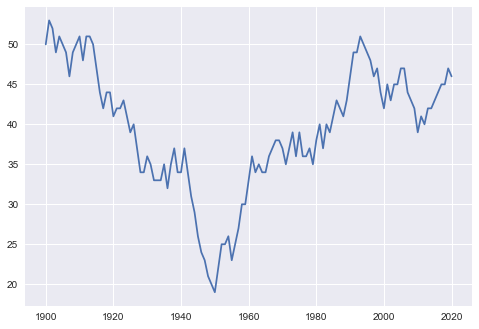

In [2]:
# Create a synthetic data set:

random.seed(a="It's...")
x, y = zip(*enumerate(accumulate((random.randint(-3, 3) for n in range(120)), initial=50), start=1900))

# and a quick plot:

plt.plot(x, y);

In [3]:
# Create a PeakTree for the data set:

t1 = hip.PeakTree(enumerate(y))

Now plot the tree `t1` together with the data set `x, y`:

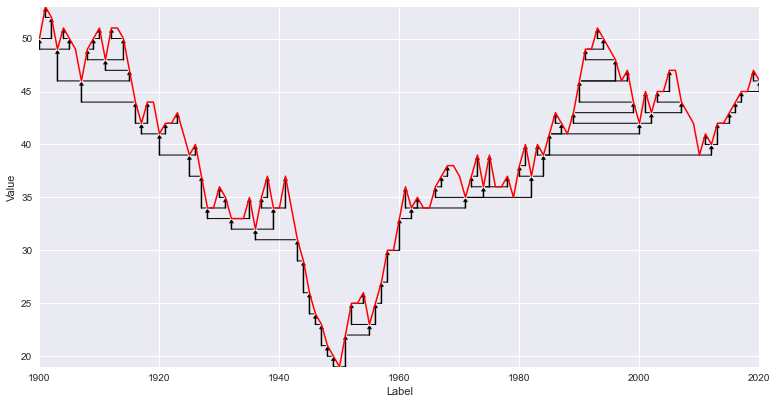

In [4]:
# hide away some plotting details:
def add_L_arrow(axes, tail_x, tail_y, head_x, head_y, color="black"):
    axes.add_patch(matplotlib.patches.FancyArrowPatch(
                                (tail_x, tail_y),
                                (head_x, tail_y),
                                arrowstyle='-',
                                shrinkA=2, shrinkB=0,
                                lw=1,
                                color=color)
                  )
    axes.add_patch(matplotlib.patches.FancyArrowPatch(
                                (head_x, tail_y),
                                (head_x, head_y),
                                arrowstyle='->,head_length=2, head_width=1.5',
                                shrinkA=0, shrinkB=1,
                                lw=1.5,
                                color=color)
                  )


# make a plot:
fig = plt.figure(figsize=(10.0, 5.0))
ax = fig.add_axes([.1,.1,1,1])
ax.set_xlim([1900,2020])
ax.set_ylim([min(y), max(y)])
ax.set_xlabel('Label')
ax.set_ylabel('Value')

# for nodes in the tree, draw arrow from parent to node:
for n in t1:
    if t1.is_nonroot(n):
        p = t1.parent(n)
        # plot arrow from p to n:
        add_L_arrow(ax, x[p], y[p], x[n], y[n])

# plot data set x, y:
ax.plot(x,y, lw=1.5, c="red");

In this plot, each arrow is a parent-to-child vertex. So, that's how to plot a PeakTree!

## Branch vs linear nodes

Some parents (called linear nodes) have a single child, other parents (called branch nodes) have at least two children. Let's use color to distinguish linear and branch nodes. The PeakTree methods `.linear_nodes` and `.branch_nodes` let us iterate over linear nodes and branch nodes separately. (There's a third kind of node, `.leaf_nodes`, but they have no children to plot.)

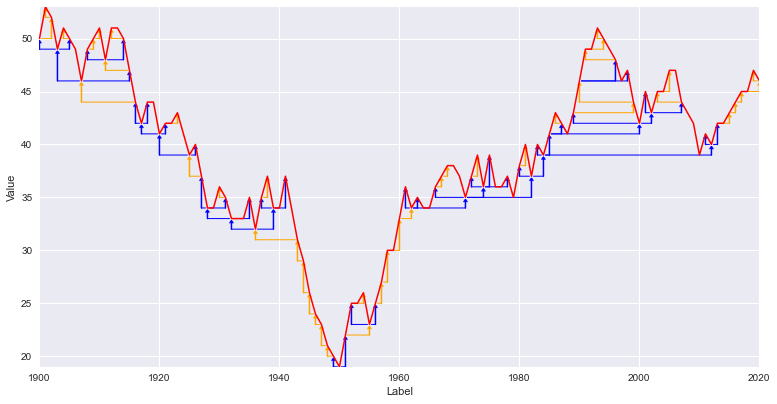

In [5]:
# make a plot:
fig = plt.figure(figsize=(10.0, 5.0))
ax = fig.add_axes([.1,.1,1,1])
ax.set_xlim([1900,2020])
ax.set_ylim([min(y), max(y)])
ax.set_xlabel('Label')
ax.set_ylabel('Value')

# for branch nodes, draw blue arrow to each child
for n in t1.branch_nodes():
    for c in t1.children(n):
        # plot blue arrow from n to c:
        add_L_arrow(ax, x[n], y[n], x[c], y[c], "blue")

# for linear nodes, draw orange arrow to the child
for n in t1.linear_nodes():
    for c in t1.children(n):
        # plot orange arrow from n to c:
        add_L_arrow(ax, x[n], y[n], x[c], y[c], "orange")
        
# plot data set x, y:
ax.plot(x,y, lw=1.5, c="red");

## High versus low child nodes

The children method, `t1.children(n)`, returns a tuple of node `n`'s children sorted after height. The first one is highest and is also returned by `t1.high(n)`, while the rest of the tuple is returned by `t1.low(n)`. Let us use color to distinguish high and low children. The PeakTree methods `.low_descendants` and `.high_descendants` let us iterate over low child nodes and high child nodes separately.

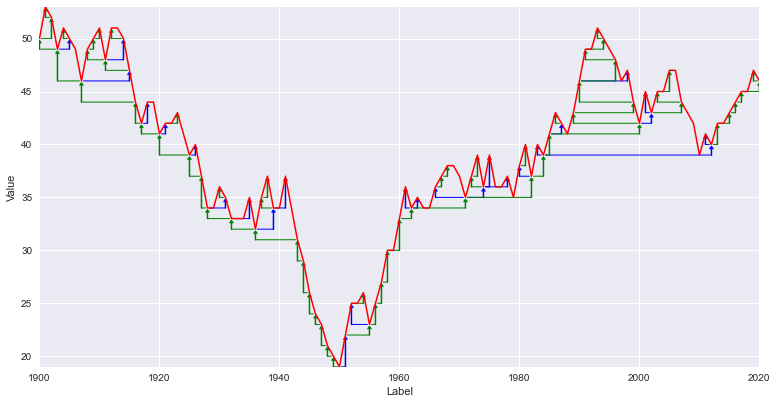

In [6]:
# make a plot:
fig = plt.figure(figsize=(10.0, 5.0))
ax = fig.add_axes([.1,.1,1,1])
ax.set_xlim([1900,2020])
ax.set_ylim([min(y), max(y)])
ax.set_xlabel('Label')
ax.set_ylabel('Value')

# for low descendants, draw blue arrow from parent
for n in t1.low_descendants():
    p = t1.parent(n)
    # plot blue arrow from p to n:
    add_L_arrow(ax, x[p], y[p], x[n], y[n], "blue")

# for high descendants, draw green arrow from parent
for n in t1.high_descendants():
    p = t1.parent(n)
    # plot green arrow from p to n:
    add_L_arrow(ax, x[p], y[p], x[n], y[n], "green")

# plot data set x, y:
ax.plot(x,y, lw=1.5, c="red");

In this plot, each node has a mode (highest point), which can be reached by following the path of green arrows (the mode path). Or use the methods `mode` and `mode_path`. 

## Another way
In the figures above, the necessary coordinates for plotting the tree were retrieved from the data set `x, y`. This could be called a 'data-centric' way of plotting, as opposed to an object-centric way:
- **Data-centric plotting with "indexed" peaks.**
With sequential data, such as our two lists `x` and `y`, we can use the data set to provide the coordinates for plotting: `(x[i], y[i])` are the coordinates of point `i`. If a PeakTree is initialized with `enumerate(y)`, then it will identify each peak by its index `i`. But the PeakTree will contain no information about the x-coordinates.
- **Object-centric plotting with "positioned" peaks.**
We can instead let a PeakTree instance provide the coordinates for plotting, without calling back to the original data set. The PeakTree must then be initialized to contain the x-positions as well.

Small changes in the data-centric code above can make it object-centric instead:

In [7]:
# Create a PeakTree with "positioned" peaks:

xy_pairs = zip(x, y)

t2 = hip.PeakTree(zip(xy_pairs, y))

# and a quick view:

print(t2)

# Notation: <high> /& <low>/ => <parent>
(1901, 53) => (1902, 52) => (1900, 50) /& (1905, 50)/ => (1903, 49) /& (1915, 47)/ => (1907, 46) => (1916, 44) /& (1918, 44)/ => (1917, 42) /& (1921, 42)/ => (1920, 41) /& (1926, 40)/ => (1925, 39) => (1927, 37) /& (1931, 35)/ => (1928, 34) /& (1935, 35)/ => (1932, 33) /& (1939, 34)/ => (1936, 32) => (1943, 31) => (1944, 29) => (1945, 26) => (1946, 24) => (1947, 23) => (1948, 21) => (1949, 20) /& (1951, 22)/ => (1950, 19).
(1993, 51) => (1994, 50) => (1991, 49) => (1996, 48) /& (1998, 47)/ => (1990, 46) => (1999, 44) => (1989, 43) /& (2002, 43)/ => (2000, 42) /& (1987, 42)/ => (1985, 41) /& ((2012, 40), (1983, 40))/ => (1984, 39) /& (1980, 38)/ => (1982, 37) /& ((1974, 36), (1966, 36))/ => (1971, 35) /& ((1961, 36), (1963, 35))/ => (1962, 34) => (1960, 33) => (1958, 30) => (1957, 27) => (1956, 25) /& (1952, 25)/ => (1955, 23) => (1951, 22).
(1938, 37) => (1937, 35) /& (1941, 37)/ => (1939, 34).
(1930, 36) => (1931, 35).
(1923, 43) => (1921, 42).

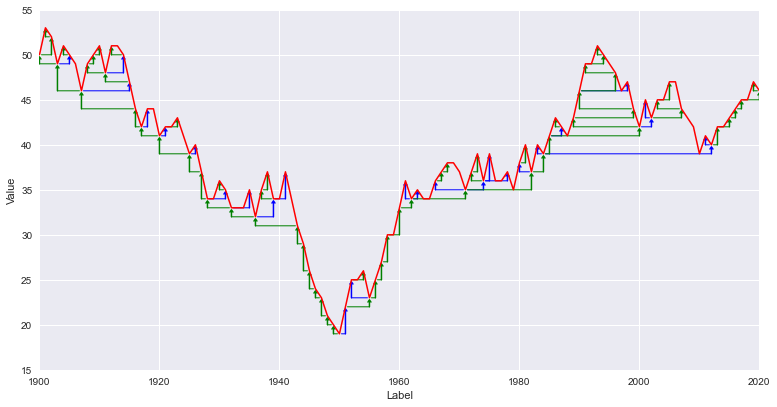

In [8]:
# make a new plot:
fig = plt.figure(figsize=(10.0, 5.0))
ax = fig.add_axes([.1,.1,1,1])
ax.set_xlim([1900,2020])
ax.set_ylim([15, 55])
ax.set_xlabel('Label')
ax.set_ylabel('Value')


# iterate over low child nodes:
for k in t2.low_descendants():
    i = t2.parent(k)
    # plot blue arrow from i to k:
    add_L_arrow(ax, *i, *k, "blue")

# iterate over high child nodes:
for j in t2.high_descendants():
    i = t2.parent(j)
    # plot green arrow from i to j:
    add_L_arrow(ax, *i, *j, "green")


ax.plot(x,y, lw=1.5, c="red");

Which is the same plot as before.

As a last example, we can initialize a PeakTree with `zip(x, y)` instead. Then it will identify each peak by its position `x` only. The PeakTree's `.data`-dict can be used to provide the `y`-values when plotting:


In [9]:
# Create a PeakTree with "positioned" peaks:

t3 = hip.PeakTree(zip(x, y))

# and a quick view:

print(t3)

# Notation: <high> /& <low>/ => <parent>
1901 => 1902 => 1900 /& 1905/ => 1903 /& 1915/ => 1907 => 1916 /& 1918/ => 1917 /& 1921/ => 1920 /& 1926/ => 1925 => 1927 /& 1931/ => 1928 /& 1935/ => 1932 /& 1939/ => 1936 => 1943 => 1944 => 1945 => 1946 => 1947 => 1948 => 1949 /& 1951/ => 1950.
1993 => 1994 => 1991 => 1996 /& 1998/ => 1990 => 1999 => 1989 /& 2002/ => 2000 /& 1987/ => 1985 /& (2012, 1983)/ => 1984 /& 1980/ => 1982 /& (1974, 1966)/ => 1971 /& (1961, 1963)/ => 1962 => 1960 => 1958 => 1957 => 1956 /& 1952/ => 1955 => 1951.
1938 => 1937 /& 1941/ => 1939.
1930 => 1931.
1923 => 1921.
1910 => 1909 => 1908 /& 1914/ => 1911 => 1915.
1904 => 1905.
1912 => 1914.
1954 => 1952.
1973 => 1972 /& (1975, 1978)/ => 1974.
1968 => 1967 => 1966.
1981 => 1980.
2019 => 2020 => 2017 => 2016 => 2015 => 2013 /& 2011/ => 2012.
1986 => 1987.
2005 => 2003 => 2007 /& 2001/ => 2002.



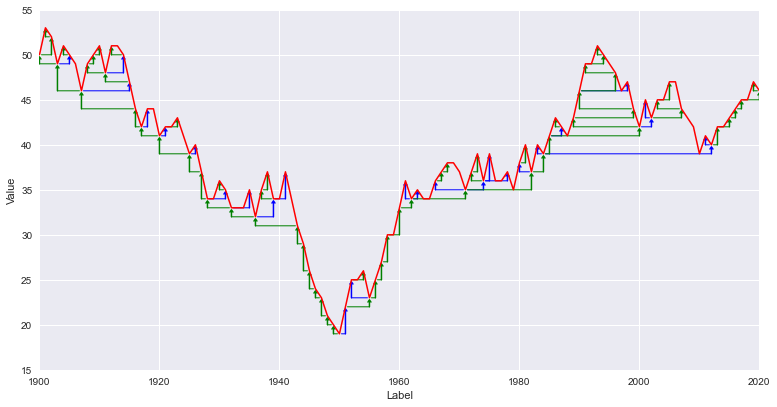

In [10]:
# make a new plot:
fig = plt.figure(figsize=(10.0, 5.0))
ax = fig.add_axes([.1,.1,1,1])
ax.set_xlim([1900,2020])
ax.set_ylim([15, 55])
ax.set_xlabel('Label')
ax.set_ylabel('Value')


# iterate over low child nodes:
for xk in t3.low_descendants():
    xi = t3.parent(xk)
    # plot blue arrow from xi to xk:
    add_L_arrow(ax, xi, t3.data[xi], xk, t3.data[xk], "blue")

# iterate over high child nodes:
for xj in t3.high_descendants():
    xi = t3.parent(xj)
    # plot green arrow from xi to xj:
    add_L_arrow(ax, xi, t3.data[xi], xj, t3.data[xj], "green")


ax.plot(x,y, lw=1.5, c="red");